In [1]:
import matplotlib.pyplot as plt
from pymongo import DESCENDING

from database import DatabaseStatistics

CATEGORY = "Python"

Run the following code block if you are working with MongoDB.

In [2]:
db = DatabaseStatistics()
collection = db.connect_collection()

# Find the last document.
with collection.find({"category": CATEGORY}).sort(
    "to_datetime", DESCENDING
).limit(1) as cursor:
    statistics = list(cursor)[0]

db.client.close()

No MongoDB? Just run the code below to get statistics from a file.

In [2]:
import csv

with open(f"{DatabaseStatistics.collection}.csv") as csv_file:
    reader = csv.DictReader(csv_file)
    statistics = [
        item | {"technology_frequency": eval(item["technology_frequency"])}
        for item in reader
    ][-1]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Python'),
  Text(1, 0, 'AWS'),
  Text(2, 0, 'AI'),
  Text(3, 0, 'Django'),
  Text(4, 0, 'Docker'),
  Text(5, 0, 'SQL'),
  Text(6, 0, 'CI'),
  Text(7, 0, 'API'),
  Text(8, 0, 'GraphQL'),
  Text(9, 0, 'Science'),
  Text(10, 0, 'Flask'),
  Text(11, 0, 'GIT'),
  Text(12, 0, 'Linux'),
  Text(13, 0, 'CD'),
  Text(14, 0, 'Kubernetes'),
  Text(15, 0, 'ML'),
  Text(16, 0, 'FastAPI'),
  Text(17, 0, 'JavaScript'),
  Text(18, 0, 'React'),
  Text(19, 0, 'PostgreSQL')])

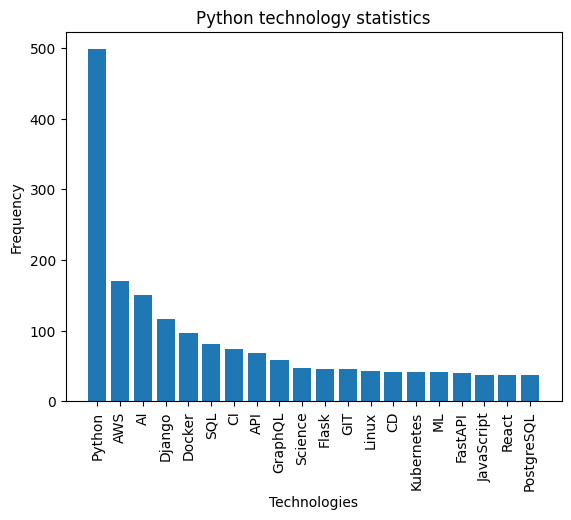

In [3]:
technology_frequency = statistics["technology_frequency"]
plt.bar(technology_frequency.keys(), technology_frequency.values())
plt.title(f"{statistics['category']} technology statistics")
plt.xlabel("Technologies")
plt.ylabel("Frequency")
plt.xticks(rotation=90)